# 🏏 IPL Data Analysis Project (2008–2023)

This notebook analyzes Indian Premier League (IPL) data to uncover patterns in team performance, player statistics, venue distribution, and more.

### 📁 Dataset:
- `matches.csv`: Match-level data (season, winner, venue, etc.)
- `deliveries.csv`: Ball-by-ball data (batsman, bowler, runs, dismissals)

### 🛠 Tools Used:
- Python, Pandas, Matplotlib, Seaborn

### 👨‍💻 Objective:
- Find most successful teams and players
- Analyze toss impact
- Explore city and season trends
- Visualize player performance (runs, wickets)

Scroll down to see step-by-step analysis with visuals and insights.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 📌 Step 1: Load Data


In [50]:


matches=pd.read_csv("matches.csv")
matches.head()
deliveries=pd.read_csv("deliveries.csv")
print(f"Matches Shape:", matches.shape)
print(f"Deliveries Shape:", deliveries.shape)
matches.info()
matches.head()

Matches Shape: (1095, 20)
Deliveries Shape: (260920, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  sup

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [51]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


## 🧹 Step 2: Clean Missing Values



In [52]:
matches.isnull().sum()
deliveries.isnull().sum()
deliveries['extras_type'].fillna("None",inplace=True) 
deliveries['player_dismissed'].fillna("Not Dismissed",inplace=True) 
deliveries['dismissal_kind'].fillna("None",inplace=True) 
deliveries['fielder'].fillna("None",inplace=True) 
matches['date']=pd.to_datetime(matches['date'])
matches=matches[matches['winner'].notna()]
matches['city'].fillna('Unknown', inplace=True)
matches['player_of_match'].fillna('None', inplace=True)
matches.drop(columns="method", inplace=True)
matches['result_margin'].fillna(0, inplace=True)
matches.isnull().sum()

C:\Users\Pritam\AppData\Local\Temp\ipykernel_10776\1428613549.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deliveries['extras_type'].fillna("None",inplace=True)
C:\Users\Pritam\AppData\Local\Temp\ipykernel_10776\1428613549.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

## 📊 Step 3: Team Analysis

# Total Match Played

In [53]:
print("Total Matches :",matches.shape[0])

Total Matches : 1090


# Most Successful Team

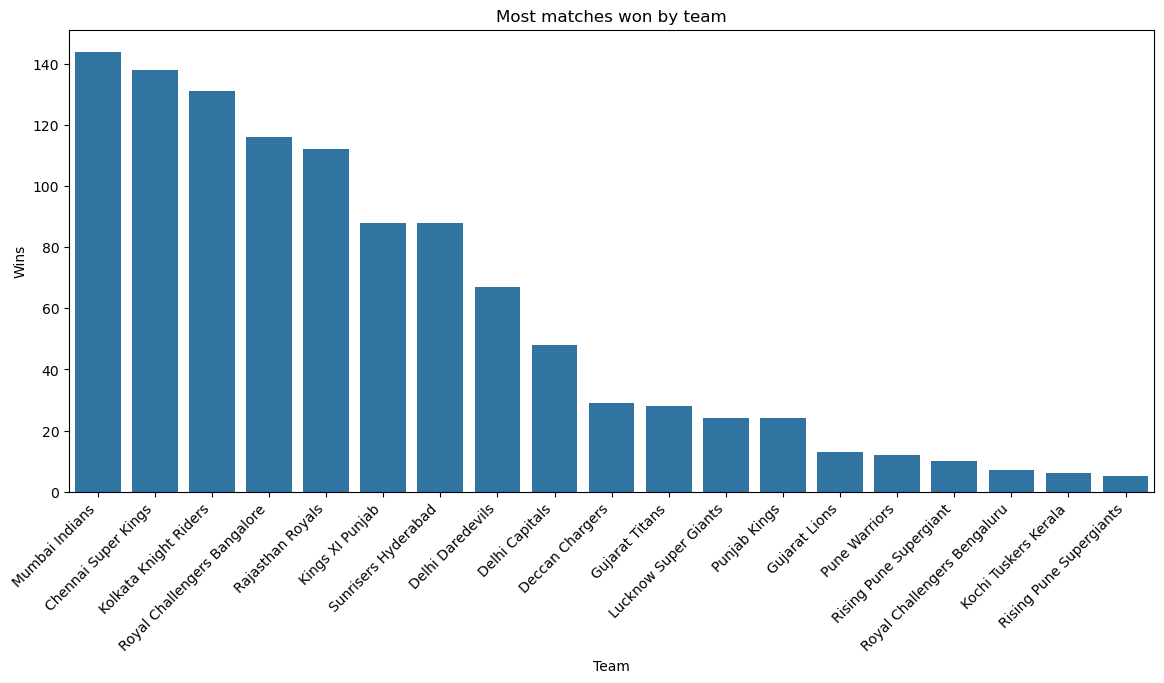

In [54]:
winner=matches['winner'].value_counts()
plt.figure(figsize=(14,6))
plt.xticks(rotation=45, ha='right')
sns.barplot(x=winner.index,y=winner.values)
plt.xlabel("Team")
plt.ylabel("Wins")
plt.title("Most matches won by team")
plt.show()


 ✅ **Insight:** Mumbai Indians have won the most matches in IPL history, followed by Chennai Super Kings. Both teams have shown consistent top-level performance over the years.


# Toss impact on match win

In [55]:
same=matches[matches['toss_winner']==matches['winner']]


In [56]:
toss_effect=round(len(same)/len(matches) *100,2)
toss_effect

50.83

✅ **Insight:** Around 50–52% of the teams that won the toss also won the match. This suggests that while the toss can influence the outcome slightly, it doesn't guarantee a win.


# Match Played by City

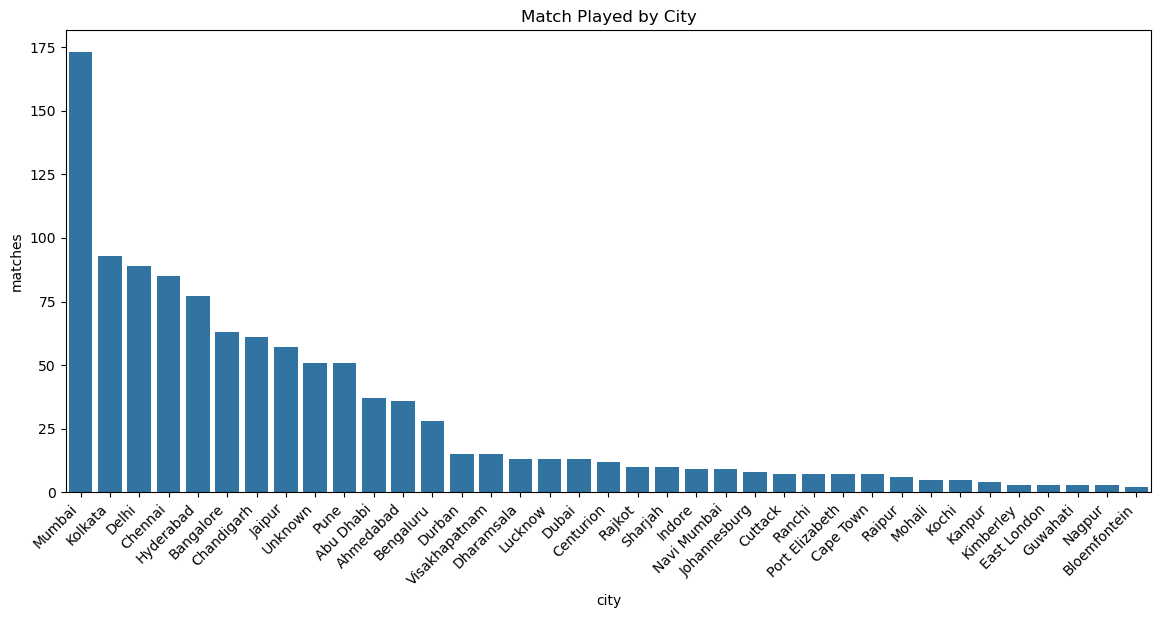

In [57]:
city=matches['city'].value_counts()
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.barplot(x=city.index,y=city.values)
plt.xlabel("city")
plt.ylabel("matches")
plt.title("Match Played by City")
plt.show()

✅ **Insight:** Cities like Mumbai, Bengaluru, Delhi, and Kolkata have hosted the most matches. These cities are central to IPL due to their strong fan base and infrastructure.


# Matches Per season

In [58]:
season=matches['season'].value_counts().sort_index()
season

season
2007/08    58
2009       57
2009/10    60
2011       72
2012       74
2013       76
2014       60
2015       57
2016       60
2017       59
2018       60
2019       59
2020/21    60
2021       60
2022       74
2023       73
2024       71
Name: count, dtype: int64

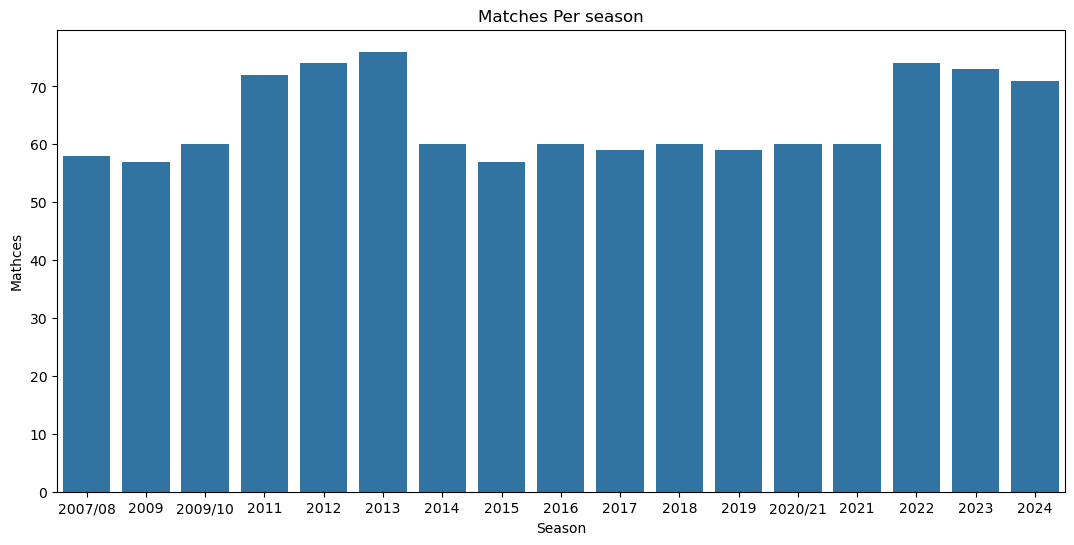

In [59]:
plt.figure(figsize=(13,6))
sns.barplot(x=season.index,y=season.values)
plt.xlabel("Season")
plt.ylabel("Mathces")
plt.title("Matches Per season")
plt.show()


✅ **Insight:** The number of IPL matches has generally increased each year, with peaks in 2011, 2012, and 2022. Fewer matches were played in 2020 due to the COVID-19 pandemic.


## 🎯 Step 4: Player Performance

# Top 10 run Scores

In [60]:
top_batsmen=deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_batsmen

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64

C:\Users\Pritam\AppData\Local\Temp\ipykernel_10776\2195966367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.index,y=top_batsmen.values,hue=None,legend=False,palette="magma")


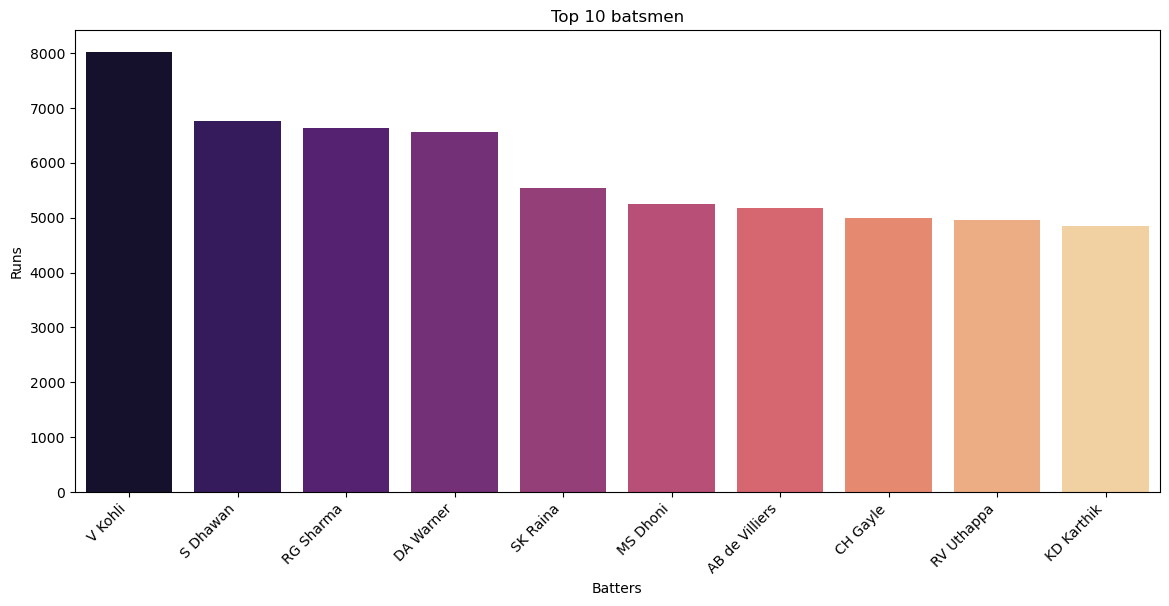

In [61]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=45,ha='right')
sns.barplot(x=top_batsmen.index,y=top_batsmen.values,hue=None,legend=False,palette="magma")
plt.xlabel("Batters")
plt.ylabel("Runs")
plt.title("Top 10 batsmen")
plt.show()

✅ **Insight:** Virat Kohli is the highest run scorer in IPL history, followed by players like Suresh Raina and David Warner. These players have shown long-term consistency.


# Top 10 wicket Takers

In [62]:
deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [85]:
wickets=deliveries[deliveries['dismissal_kind']!='None']


In [86]:
top_bowlers=wickets['dismissal_kind'].value_counts(ascending=False)
top_bowlers

dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

C:\Users\Pritam\AppData\Local\Temp\ipykernel_10776\2274897544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.index,y=top_bowlers.values,palette='BrBG')


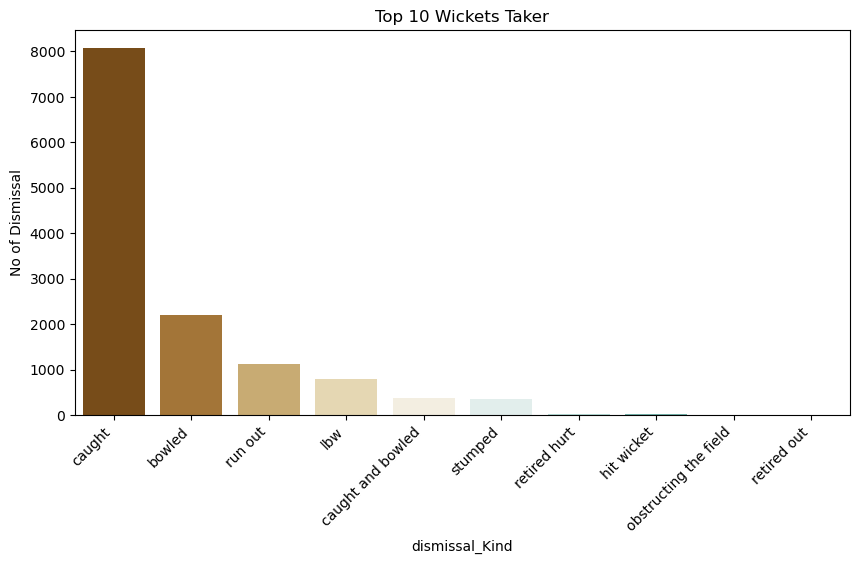

In [87]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45,ha='right')
sns.barplot(x=top_bowlers.index,y=top_bowlers.values,palette='BrBG')
plt.xlabel("dismissal_Kind")
plt.ylabel("No of Dismissal")
plt.title("Top 10 Wickets Taker")
plt.show()

✅ **Insight:** Dwayne Bravo, Lasith Malinga, and Yuzvendra Chahal are among the highest wicket takers. They have been key bowlers, especially in pressure situations.


# Most player of the match awards

In [76]:
pom=matches['player_of_match'].value_counts().head(10)
pom

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
Name: count, dtype: int64

C:\Users\Pritam\AppData\Local\Temp\ipykernel_10776\2709468797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pom.index, y=pom.values,hue=None, palette='rocket')


Text(0.5, 1.0, 'Top 10 most POM awards')

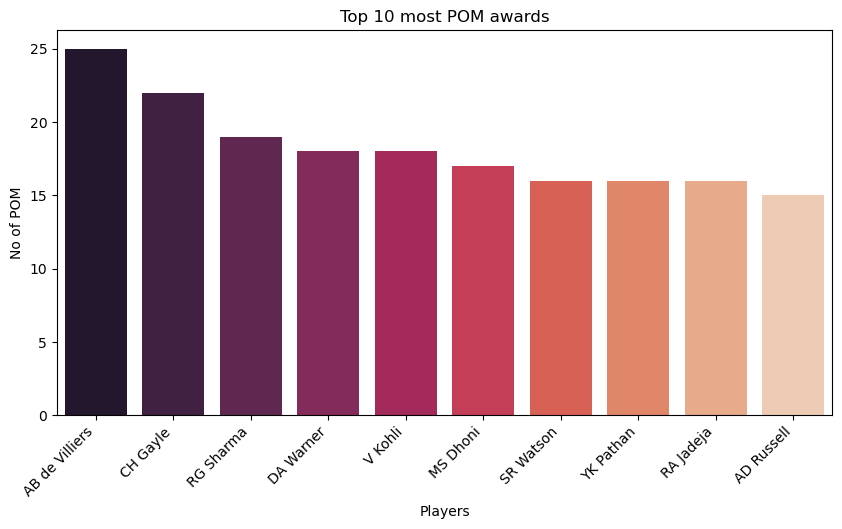

In [77]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45, ha='right')
sns.barplot(x=pom.index, y=pom.values,hue=None, palette='rocket')
plt.xlabel("Players")
plt.ylabel("No of POM")
plt.title("Top 10 most POM awards")

✅ **Insight:** Players like AB de Villiers, Chris Gayle, and MS Dhoni have received the most Player of the Match awards. This reflects their consistent impact in crucial games.


# Team Toss Decision: Bat vs Field



In [78]:
toss_decision=matches['toss_decision'].value_counts()
labels=toss_decision.index
colors = ['#1f77b4', '#ff7f0e']

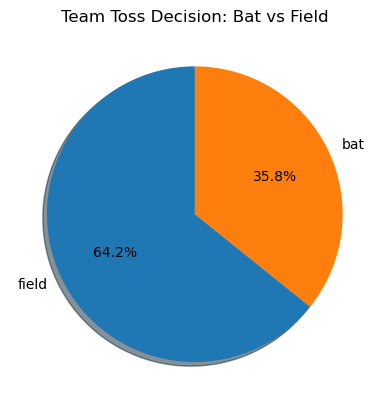

In [79]:
plt.pie(toss_decision,autopct='%1.1f%%',shadow=True,startangle=90,labels=labels,colors=colors) 
plt.title("Team Toss Decision: Bat vs Field")
plt.show()

### Key Insights:
- Mumbai Indians are the most successful team in IPL history.
- Toss-winning teams win around 52% of the matches.
- Virat Kohli is the highest run scorer.
- Malinga & Bravo among top wicket takers.
- Toss decisions lean heavily towards fielding.


# ✅ Project Completed!

This notebook presents a complete visual analysis of IPL data from 2008 to 2023. The findings can be useful for sports analysts, fans, and data enthusiasts.
